In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

In [15]:
xStar = (1,1)
f_xStar = 0
def f(x):
   return 100*(x[1]-(x[0]**2))**2 + (x[0]-1)**2

def grad_f(x):
  return [400*x[0]**3 + (2-400*x[1])*x[0] - 2 , 200*(x[1] - x[0]**2 )]

def hessian_f(x):
    return [ [1200*x[0]**2 - 400*x[1]+2 , -400*x[0] ],[ -400*x[0] , 200 ] ] 

In [16]:
def plotXDiff(plt,xValues):
  xDist = []
  for i in xValues:
    xDist.append(math.sqrt( (xStar[0] - i[0])**2 + (xStar[1] - i[1])**2 ))
  fig = plt.figure()
  fig.set_figwidth(20)
  fig.set_figheight(5)
  plt.plot(xDist,label = 'Gradient Descent' )
  plt.xlabel('t')
  plt.ylabel('XDistance')
  plt.legend(loc='best')
  plt.show()

def plotFDiff(plt,xValues):
  f_x_Dist = []
  for i in xValues:
    f_x_Dist.append(abs(f(i)))
  
  fig = plt.figure()
  fig.set_figwidth(20)
  fig.set_figheight(5)
  plt.plot(f_x_Dist,label = 'Gradient Descent' )
  plt.xlabel('t')
  plt.ylabel('FDistance')
  plt.legend(loc='best')
  plt.show()
'''
def plotF_3d(plt,xValues):
  fig = plt.figure(figsize = (12,10))
  ax = plt.axes(projection='3d')
  xt = [i[0] for i in xValues]
  yt = [i[1] for i in xValues]

  x = np.arange( min(xt)-0.5,max(xt)+0.5, 0.02)
  y = np.arange(min(yt)-0.5,max(yt)+0.5 , 0.02)

  #print(x)
  X, Y = np.meshgrid(x, y)
  Z = 100*(Y-(X**2))**2 + (X-1)**2
  surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
  #surf = ax.contour3D(X, Y, Z, 50,cmap = 'binary')

  x = np.array(xt)
  y = np.array(yt)
  z = 100*(y-(x**2))**2 + (x-1)**2
  ax.scatter(x, y, z, c = 'r', s = 50)

  # Set axes label
  ax.set_xlabel('x', labelpad=20)
  ax.set_ylabel('y', labelpad=20)
  ax.set_zlabel('z', labelpad=20)
  fig.colorbar(surf, shrink=0.5, aspect=8)
  plt.show()
'''

def plotF_3d(plt,xValues):
  fig = plt.figure(figsize = (12,10))
  ax = plt.axes(projection='3d')
  xt = [i[0] for i in xValues]
  yt = [i[1] for i in xValues]

  x = np.arange( min(xt)-0.5,max(xt)+0.5, 0.02)
  y = np.arange(min(yt)-0.5,max(yt)+0.5 , 0.02)
  
  #print(x)
  X, Y = np.meshgrid(x, y)
  Z = 100*(Y-(X**2))**2 + (X-1)**2
  surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
  #surf = ax.contour3D(X, Y, Z, 50,cmap = 'binary')
  
  ax.set_xlabel('x', labelpad=20)
  ax.set_ylabel('y', labelpad=20)
  ax.set_zlabel('z', labelpad=20)
  fig.colorbar(surf, shrink=0.5, aspect=8)
  
  x = np.array(xt)
  y = np.array(yt)
  z = 100*(y-(x**2))**2 + (x-1)**2
  #ax.scatter(x, y, z, c = 'r', s = 50)
  ln, = plt.plot([], [], [], 'ro')

 
  def update(frame):
    step = int(len(x)/100)
    ind = step*frame
    ln.set_data(x[0:ind], y[0:ind])
    ln.set_3d_properties(z[0:ind])
    return ln,

  anim = animation.FuncAnimation(fig, update, frames=400, interval=20, blit=True)
  video = anim.to_html5_video()
  html = display.HTML(video)
  display.display(html)


In [17]:
def gradientDescent(x,alpha):
  grad = grad_f(x)
  x[0] = x[0] - alpha*grad[0]
  x[1] = x[1] - alpha*grad[1]
  return x

def GD_Heavy_Ball_Momentum(x,x_prev,alpha):
  beta = 0.9
  grad = grad_f(x)
  x[0] = x[0] + beta*(x[0] - x_prev[0]) - alpha*grad[0]
  x[1] = x[1] + beta*(x[1] - x_prev[1]) - alpha*grad[1]
  return x

def Nesterov_Accelerated_Gradient_Method(x,x_prev,alpha):
  beta = 0.9
  grad = grad_f([ x[0] + beta*(x[0] - x_prev[0]) , x[1] + beta*(x[1] - x_prev[1]) ])
  x[0] = x[0] + beta*(x[0] - x_prev[0]) - alpha*grad[0]
  x[1] = x[1] + beta*(x[1] - x_prev[1]) - alpha*grad[1]
  return x

def newtonMethod(x):
  hessian_inverse = np.linalg.inv( np.array(hessian_f(x)))
  grad = np.reshape( np.array(grad_f(x)), (2,1))
  grad=np.matmul(hessian_inverse,grad)
  grad = grad.tolist()
  grad[0],grad[1] = grad[0][0],grad[1][0]
  x[0] = x[0] - grad[0]
  x[1] = x[1] - grad[1]
  return x

def QuasiNewtonMethod(x,alpha):
  hessian_inverse = np.linalg.inv( np.array(hessian_f(x)))
  hessian_inverse[0][1],hessian_inverse[1][0] = 0,0
  grad = np.reshape( np.array(grad_f(x)), (2,1))
  grad=np.matmul(hessian_inverse,grad)
  grad = grad.tolist()
  grad[0],grad[1] = grad[0][0],grad[1][0]
  x[0] = x[0] - grad[0]
  x[1] = x[1] - grad[1]
  return x

def RMSProp(x,u,alpha):
  beta = 0.9
  epi = 0.0000001
  grad = grad_f(x)
  u[0],u[1] = beta*u[0] + (1-beta)*(grad[0])**2 , beta*u[1] + (1-beta)*(grad[1])**2
  x[0],x[1] = x[0] - ( alpha/(math.sqrt(u[0])+epi) )*grad[0] , x[1] - ( alpha/(math.sqrt(u[1])+epi) )*grad[1] 
  return x,u

def ADAM(x,u,m,alpha):
  epi,beta1,beta2 = 0.1,0.9,0.9
  grad = grad_f(x)
  m[0],m[1] = beta1*m[0] + (1-beta1)*grad[0] , beta1*m[1] + (1-beta1)*grad[1]
  u[0],u[1] = beta2*u[0] + (1-beta2)*(grad[0]**2) , beta2*u[1] + (1-beta2)*(grad[1]**2)
  m[0],m[1] = m[0]/(1-beta1) , m[1]/(1-beta1)
  u[0],u[1] = u[0]/(1-beta2),u[1]/(1-beta2)
  x[0],x[1] = x[0] - ( (alpha*m[0])/( math.sqrt(u[0])+epi )  )*grad[0] , x[1] - ( (alpha*m[1])/( math.sqrt(u[1])+epi )  )*grad[1]
  return x,u,m


10000 0.001 [0.9896269083098944, 0.9793196489675065]


AttributeError: 'function' object has no attribute 'HTML'

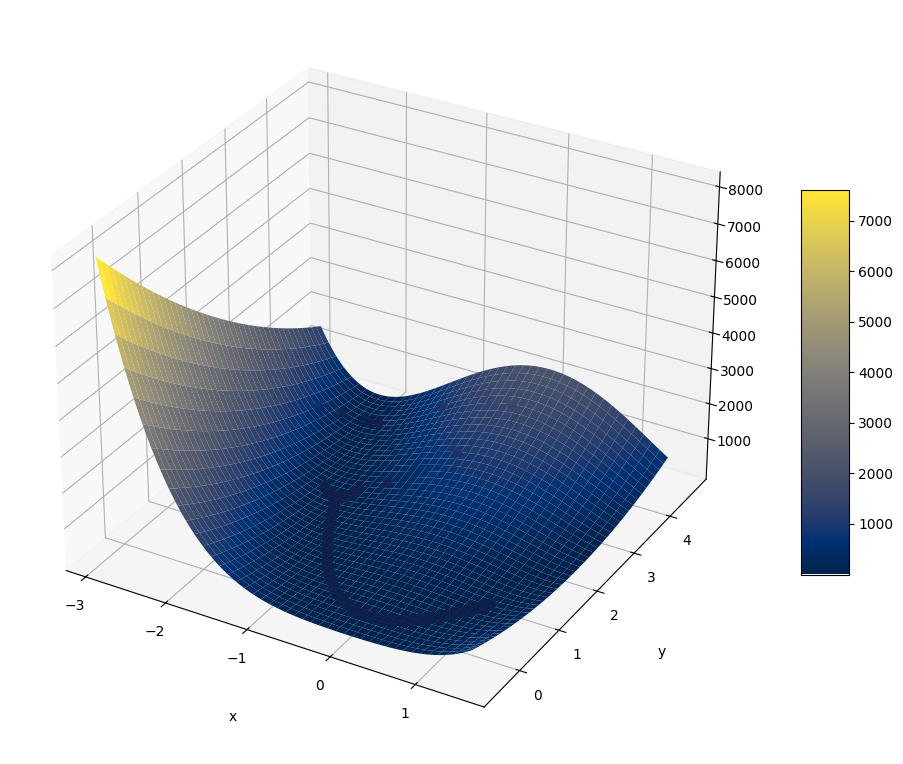

In [18]:
# GRADIENT DESCENT
xValues = []
alpha = 0.001

for T in [10000]:
  x = [-2,4]
  for t in range(T):
    xValues.append((x[0],x[1]))
    x = gradientDescent(x,alpha)
  print(T,alpha,x)

#plotXDiff(plt,xValues)
#plotFDiff(plt,xValues)


plotF_3d(plt,xValues)

10000 0.001 [1.0000000000000007, 1.0000000000000013]


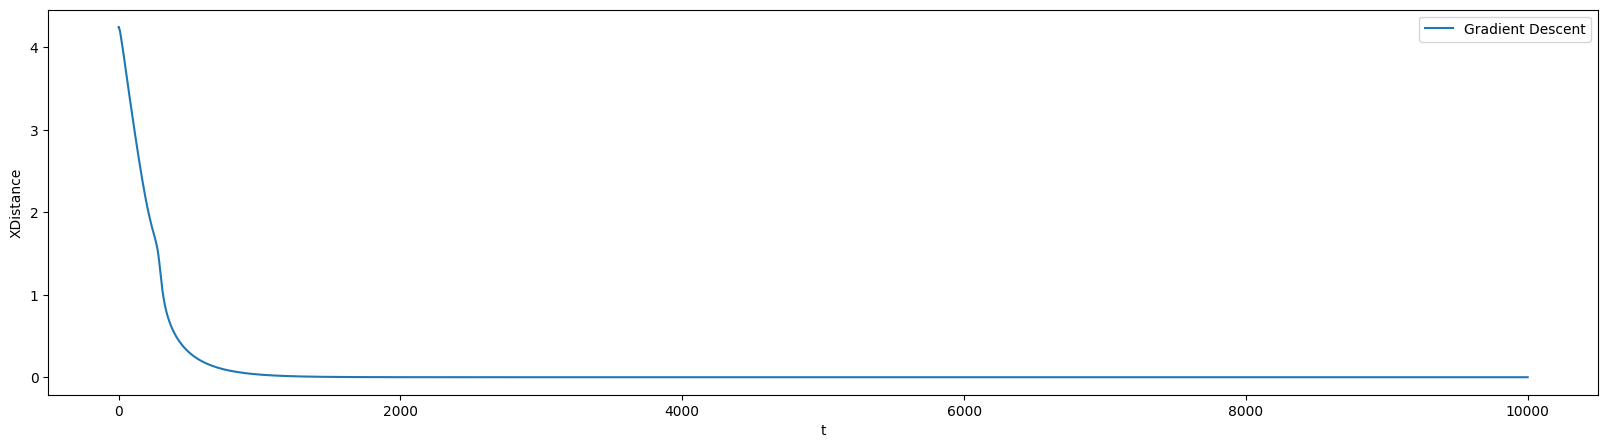

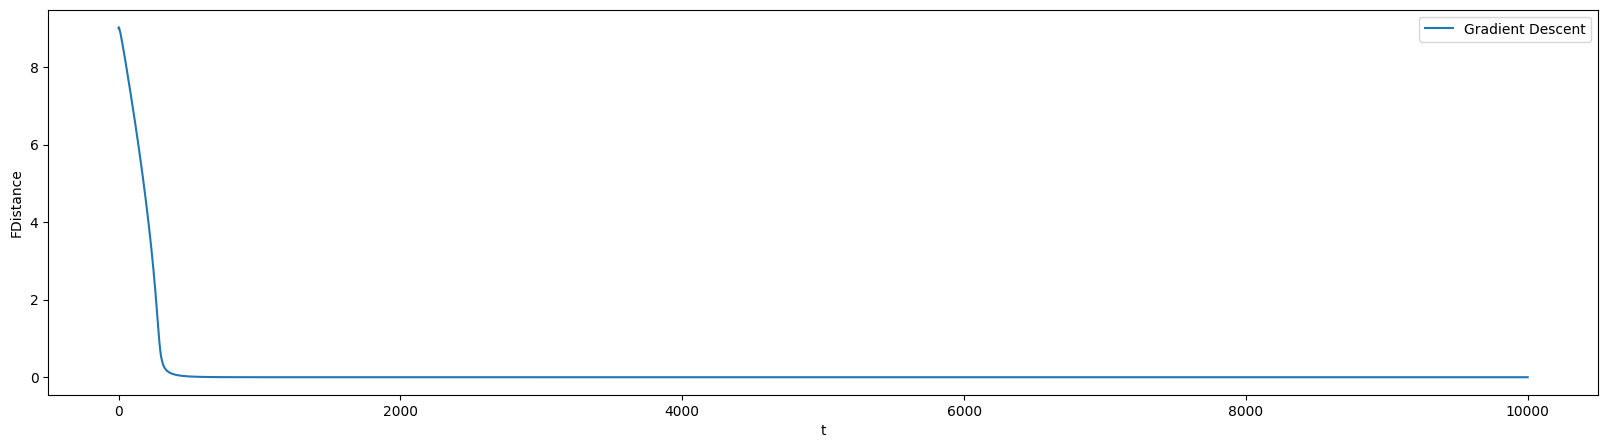

NameError: name 'animation' is not defined

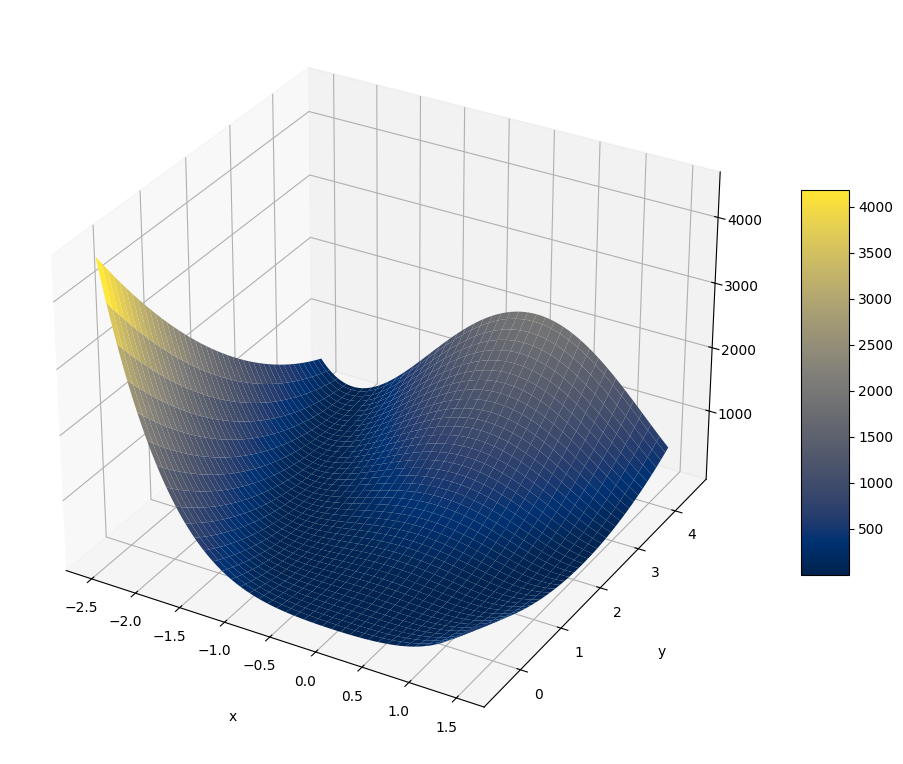

In [ ]:
# Heavy BALL MOMENTUM
xValues = []
alpha = 0.001
for T in [10000]:
  x = [-2,4]
  x_temp = [-2,4]
  x_prev = [-2,4]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x_temp[0],x_temp[1] = x[0],x[1] 
    x = GD_Heavy_Ball_Momentum(x,x_prev,alpha)
    x_prev[0],x_prev[1] = x_temp[0],x_temp[1] 
  print(T,alpha,x)

plotXDiff(plt,xValues)
plotFDiff(plt,xValues)
plotF_3d(plt,xValues)

5000 0.0001 [0.8455059879946318, 0.7142028487151317]


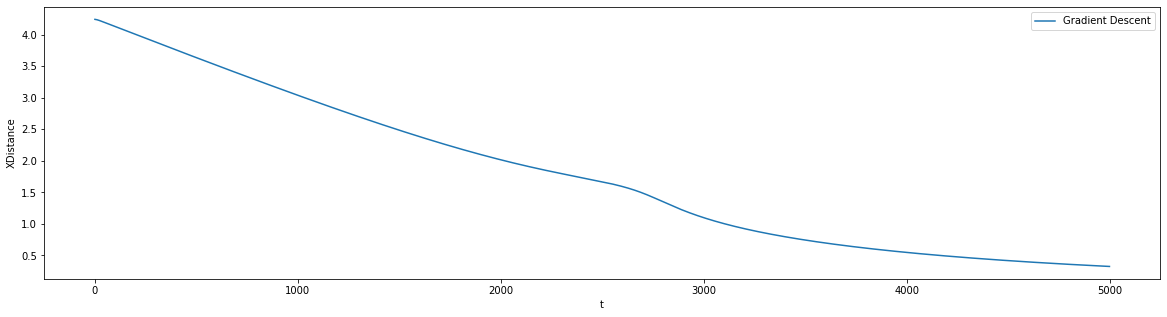

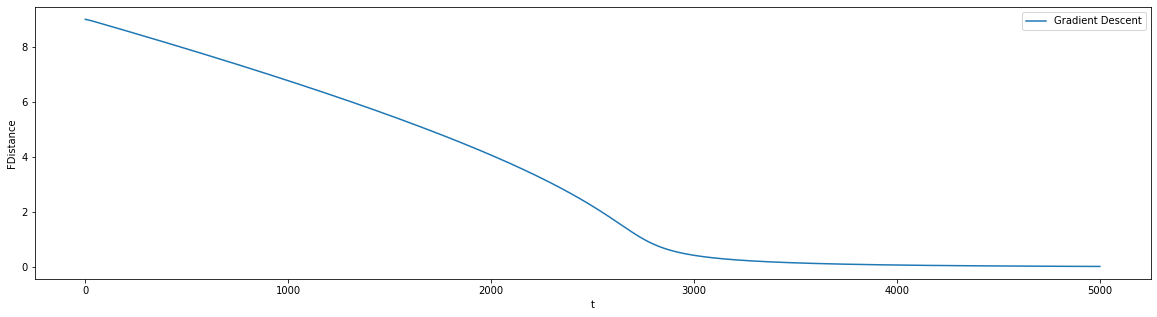

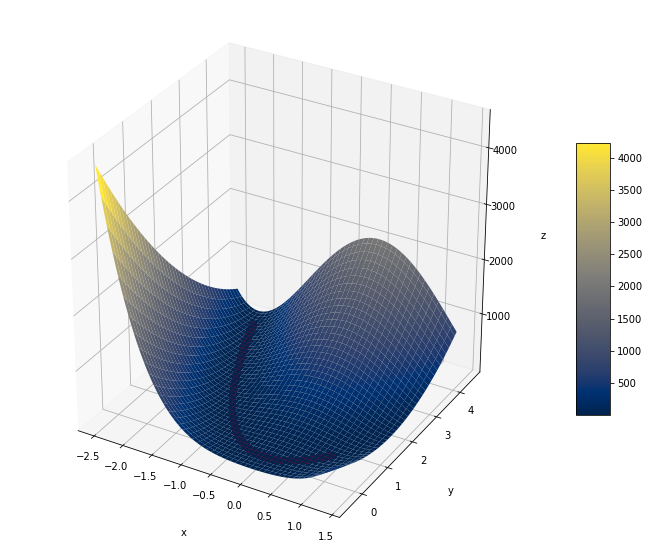

In [ ]:
# Nesterov’s Accelerated Gradient Method

xValues = []
alpha = 0.0001
for T in [5000]:
  x = [-2,4]
  x_temp = [-2,4]
  x_prev = [-2,4]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x_temp[0],x_temp[1] = x[0],x[1]
    x = Nesterov_Accelerated_Gradient_Method(x,x_prev,alpha)
    x_prev[0],x_prev[1] = x_temp[0],x_temp[1]
  print(T,alpha,x)

plotXDiff(plt,xValues)
plotFDiff(plt,xValues)
plotF_3d(plt,xValues)


100 0.001 [0.99999999999999, 0.99999999999998]


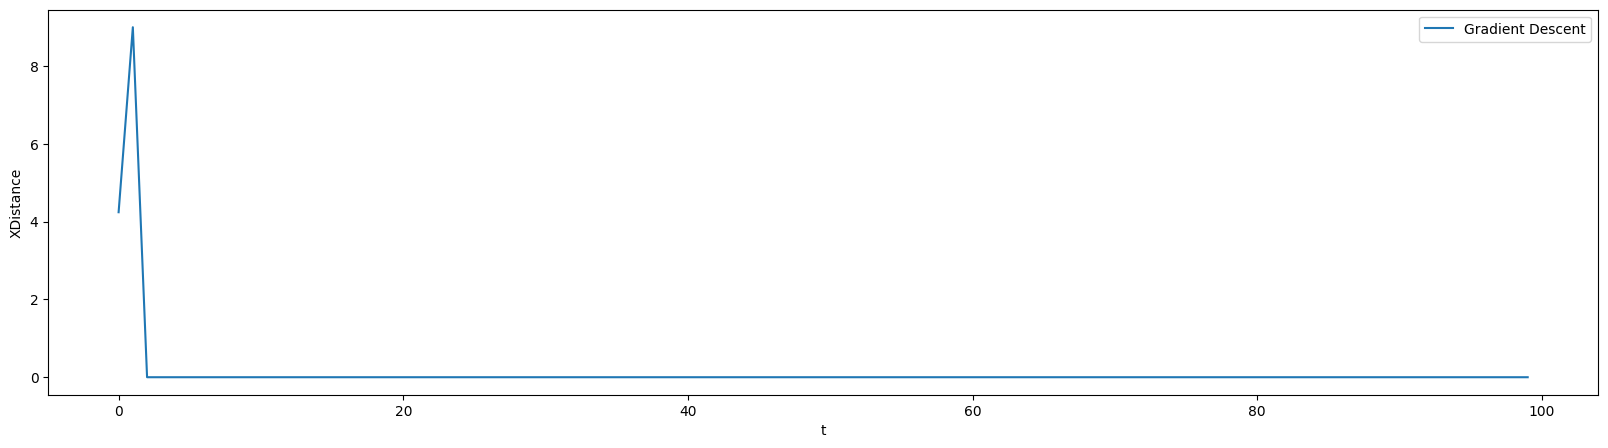

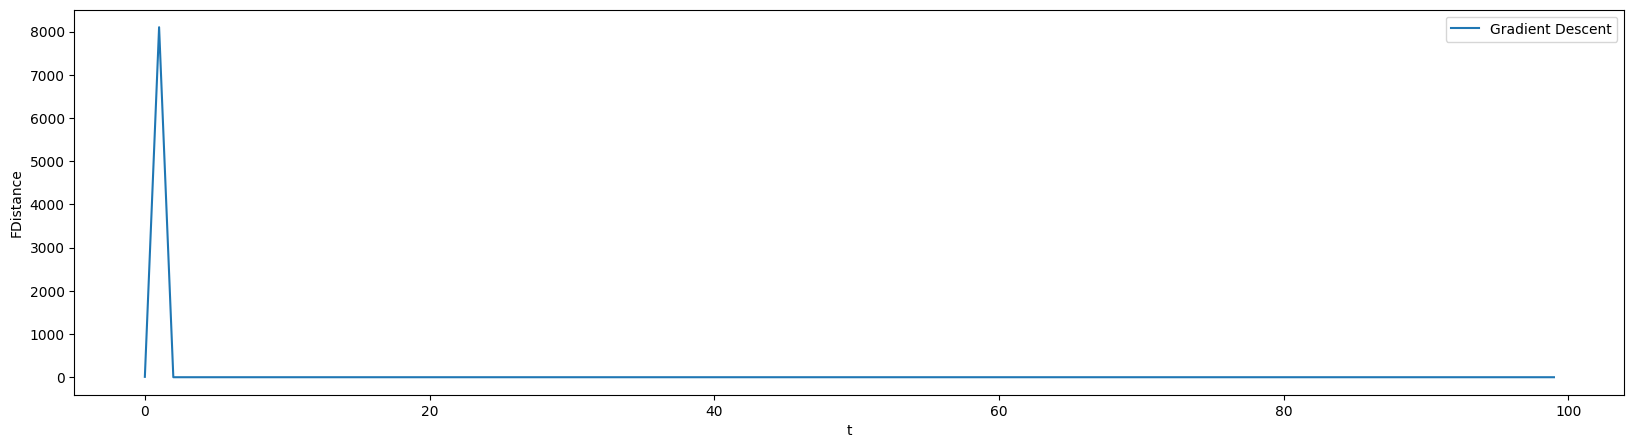

NameError: name 'animation' is not defined

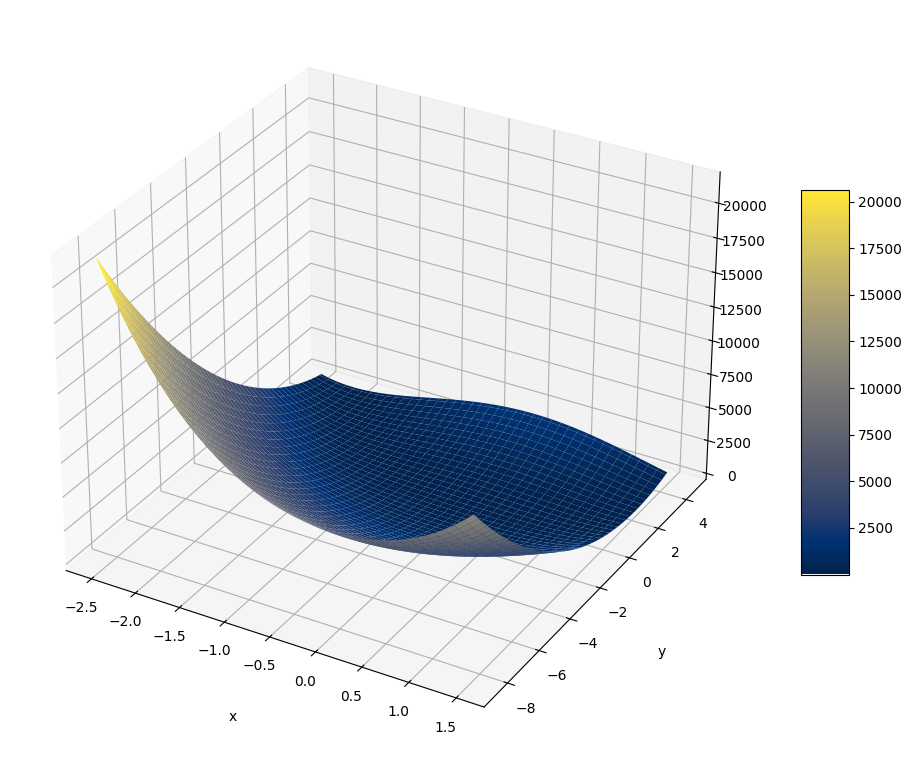

In [ ]:
# Newton Method
xValues = []
for T in [100]:
  x = [-2,4]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x = newtonMethod(x)
  print(T,alpha,x)

plotXDiff(plt,xValues)
plotFDiff(plt,xValues)
plotF_3d(plt,xValues)

100 1e-06 [1.0137364374282818, 2.58302310613342e-06]


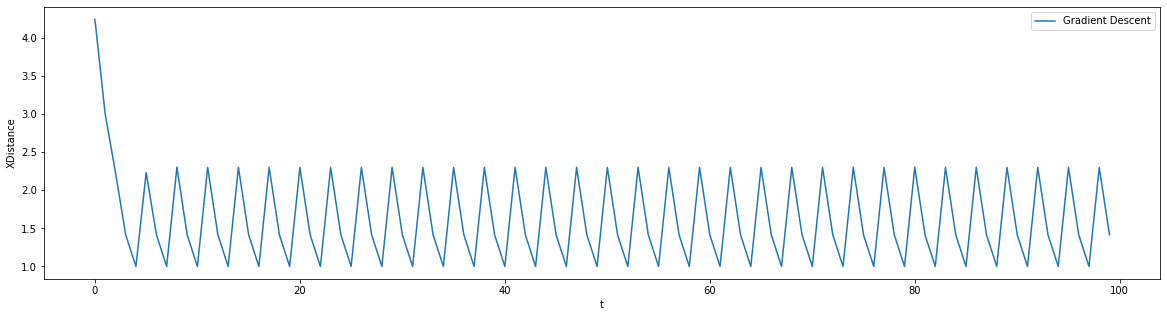

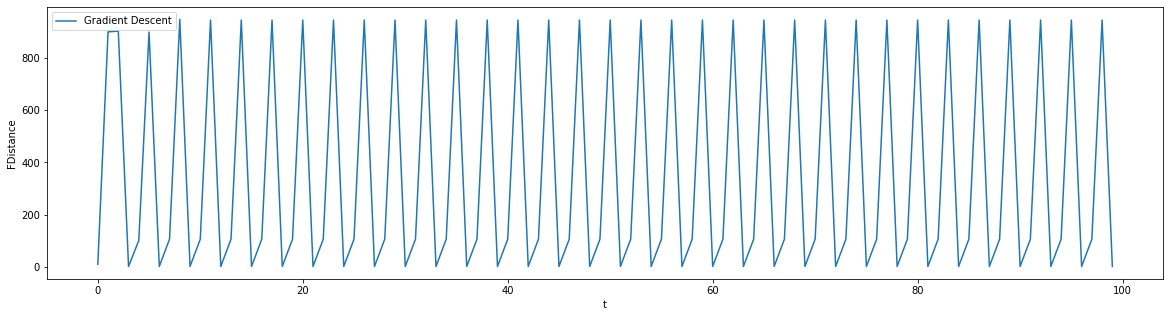

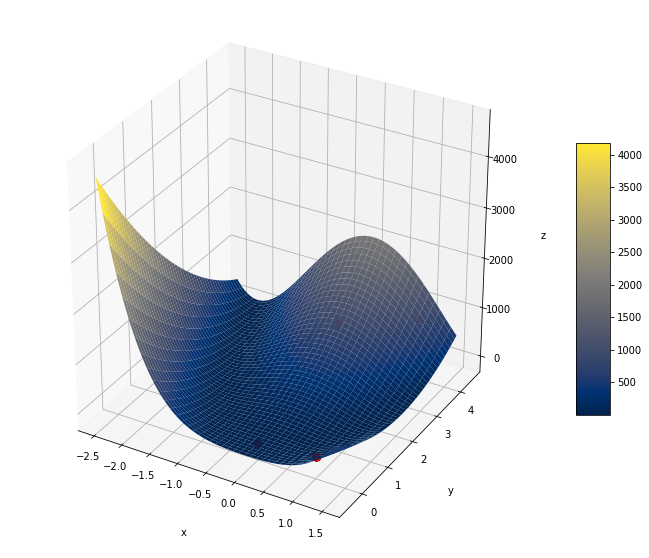

In [ ]:
#Quasi Newton Method
def QuasiNewtonMethod(x,alpha):
  hessian_inverse = np.linalg.inv( np.array(hessian_f(x)))
  hessian_inverse[0][1],hessian_inverse[1][0] = 0,0
  grad = np.reshape( np.array(grad_f(x)), (2,1))
  grad=np.matmul(hessian_inverse,grad)
  grad = grad.tolist()
  grad[0],grad[1] = grad[0][0],grad[1][0]
  x[0] = x[0] - grad[0]
  x[1] = x[1] - grad[1]
  return x
  
xValues = []
alpha = 0.000001
for T in [100]:
  x = [-2,4]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x = QuasiNewtonMethod(x,alpha)
    #print(x)  
  print(T,alpha,x)

plotXDiff(plt,xValues)
plotFDiff(plt,xValues)
plotF_3d(plt,xValues)

3000 0.01 [0.9582001757741034, 0.9034980370905704]


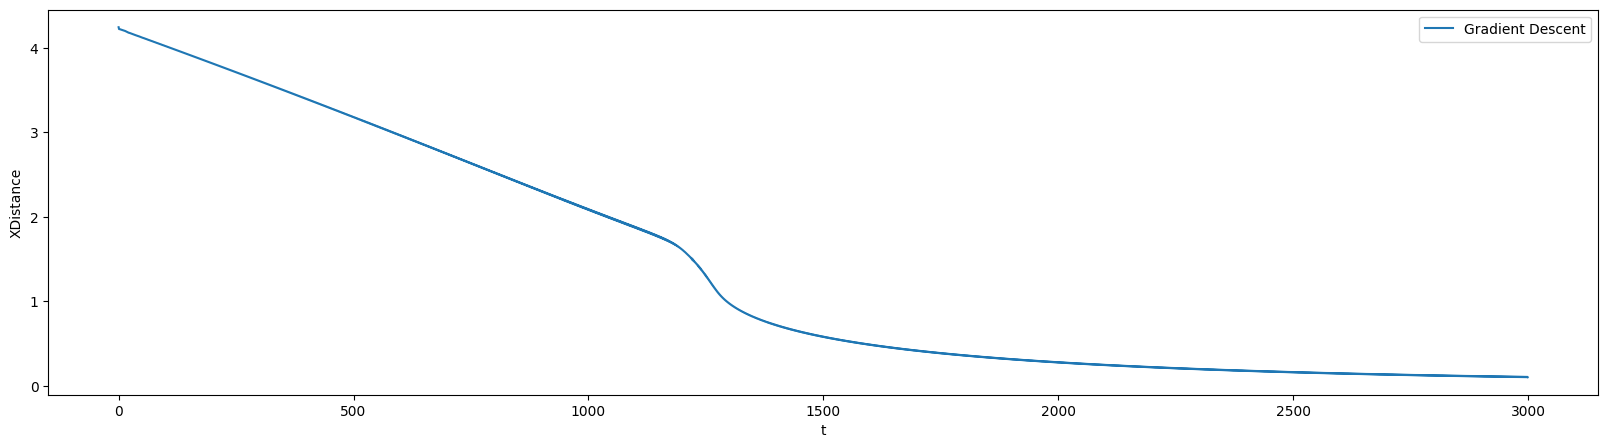

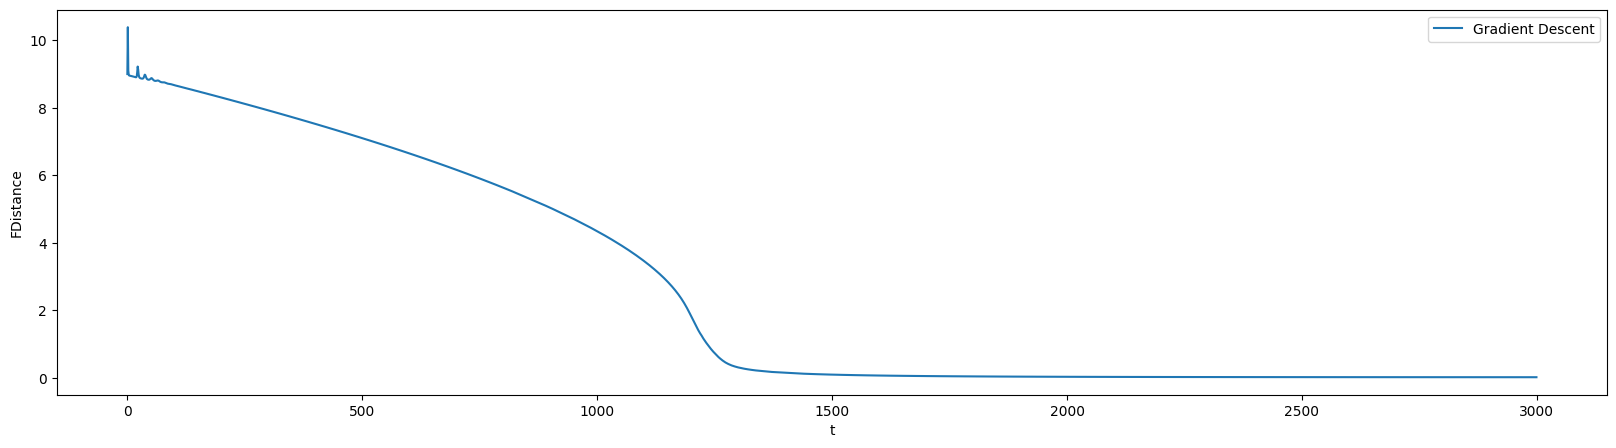

NameError: name 'animation' is not defined

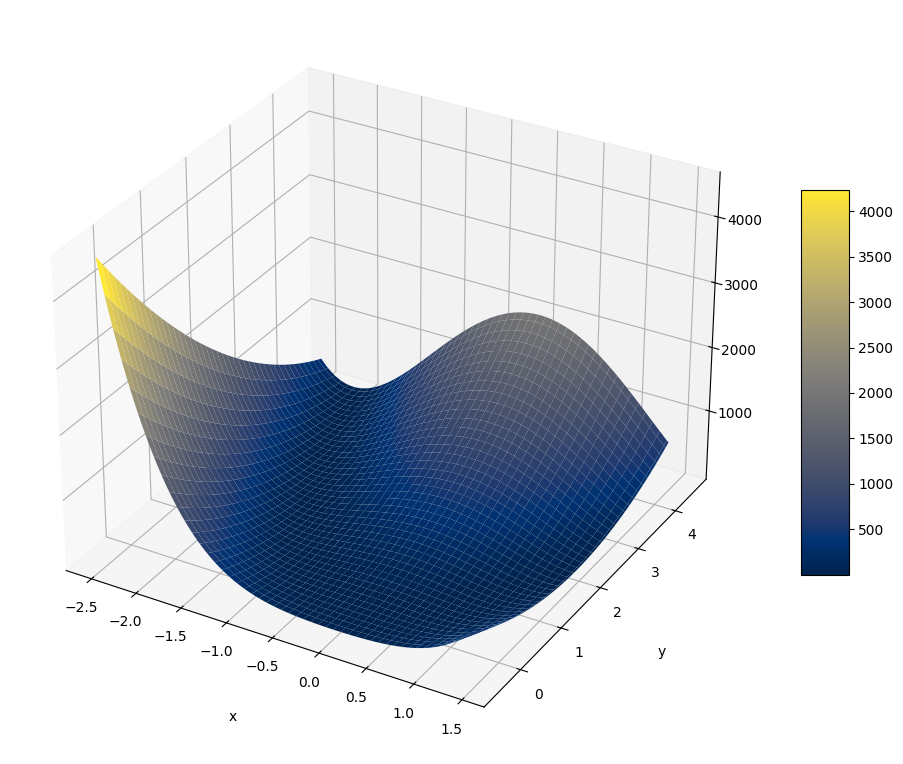

In [ ]:
#RMSProp
xValues = []
alpha = 0.01
for T in [3000]:
  x = [-2,4]
  u = [0,0]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x,u = RMSProp(x,u,alpha)
  print(T,alpha,x)

plotXDiff(plt,xValues)
plotFDiff(plt,xValues)
plotF_3d(plt,xValues)

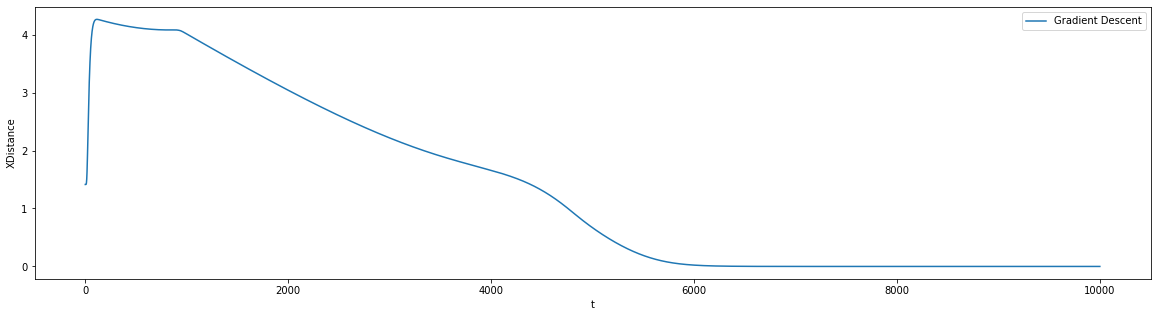

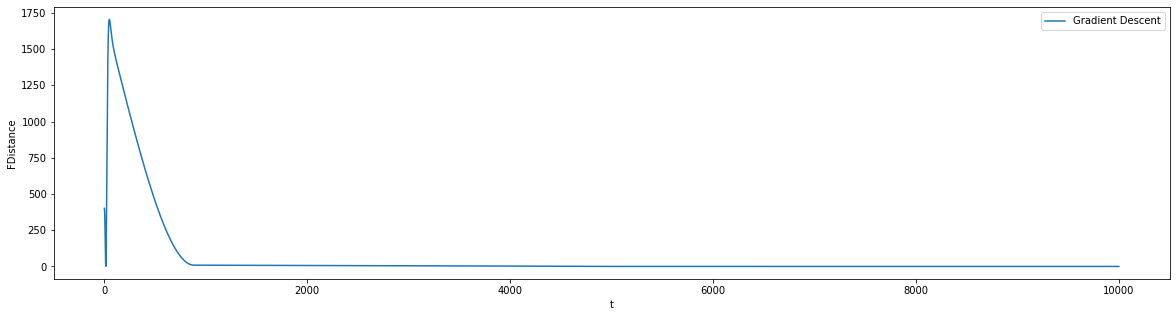

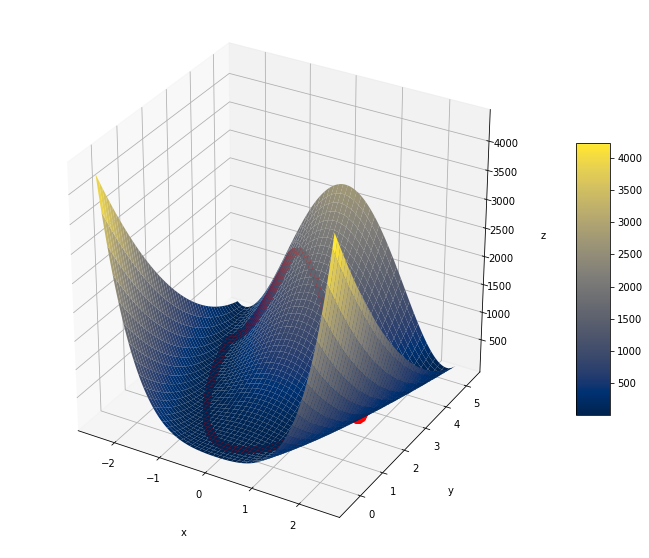

In [ ]:
#ADAM
def ADAM(x,u,m,alpha,t):
  epi,beta1,beta2 = 0.1,0.9,0.9
  grad = grad_f(x)
  #print(grad)
  m[0],m[1] = beta1*m[0] + (1-beta1)*grad[0] , beta1*m[1] + (1-beta1)*grad[1]
  
  u[0],u[1] = beta2*u[0] + (1-beta2)*(grad[0]**2) , beta2*u[1] + (1-beta2)*(grad[1]**2)
  m[0],m[1] = m[0]/(1-beta1**(t+1)) , m[1]/(1-beta1**(t+1))
  u[0],u[1] = u[0]/(1-beta2**(t+1)),u[1]/(1-beta2**(t+1))
  #print('m',m)
  #print('u',u)
  x[0],x[1] = x[0] - ( (alpha*m[0])/( math.sqrt(u[0])+epi )  ) , x[1] - ( (alpha*m[1])/( math.sqrt(u[1])+epi )  )
  #print('x',x)
  return x,u,m

xValues = []
alpha = 0.00124
for T in [10000]:
  x = [2,2]
  u = [2,2]
  m = [2,2]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x,u,m = ADAM(x,u,m,alpha,t)
    #print('x',x)
plotXDiff(plt,xValues)
plotFDiff(plt,xValues)
plotF_3d(plt,xValues)

In [ ]:
xValues = []
alpha = 0.000001

'''
for T in [10000000]:
  x = [50,10]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x = gradientDescent(x,alpha)
  print(T,alpha,x)

for T in [10000000]:
  x = [50,10]
  x_temp = [50,10]
  x_prev = [50,10]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x_temp[0],x_temp[1] = x[0],x[1] 
    x = GD_Heavy_Ball_Momentum(x,x_prev,alpha)
    x_prev[0],x_prev[1] = x_temp[0],x_temp[1] 
  print(T,alpha,x)

for T in [10000000]:
  x = [50,10]
  x_temp = [50,10]
  x_prev = [50,10]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x_temp[0],x_temp[1] = x[0],x[1] 
    x = Nesterov_Accelerated_Gradient_Method(x,x_prev,alpha)
    x_prev[0],x_prev[1] = x_temp[0],x_temp[1]
    if t % 10000 == 0:
      print(x)  
  print(T,alpha,x)

for T in [100]:
  x = [50,10]
  x_temp = [50,10]
  x_prev = [50,10]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x = newtonMethod(x)
    print(x)  
  print(T,alpha,x)

alpha = 0.01
for T in [100]:
  x = [50,10]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x = QuasiNewtonMethod(x,alpha)
    print(x)  
  print(T,alpha,x)

alpha = 0.01
for T in [100000]:
  x = [50,10]
  u = [0,0]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x,u = RMSProp(x,u,alpha)
    if t%100==0:
      print(x)  
  print(T,alpha,x)
'''

alpha = 0.0000001
for T in [100000]:
  x = [1,1]
  u = [0,0]
  m = [0,0]
  for t in range(T):
    xValues.append([x[0],x[1]])
    x,u,m = ADAM(x,u,m,alpha)

Streaming output truncated to the last 5000 lines.
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.

KeyboardInterrupt: ignored